In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [12]:
df = pd.read_csv('stats/OECD-RPPI.csv')
pd.reset_option('display.max_colwidth')
df.head()

,LOCATION,Country,SUBJECT,Subject,GEO_COVERAGE,Geographical coverage,MEASURE,Measure,FREQUENCY,Frequency,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing...,CN,Whole country,IXOB,Index,A,Annual,...,2010,IDX,Index,0,Units,2010_100,2010=100,100.000000,NaN,NaN
1,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing...,CN,Whole country,IXOB,Index,A,Annual,...,2011,IDX,Index,0,Units,2010_100,2010=100,97.846079,NaN,NaN
2,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing...,CN,Whole country,IXOB,Index,A,Annual,...,2012,IDX,Index,0,Units,2010_100,2010=100,97.531462,NaN,NaN
3,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing...,CN,Whole country,IXOB,Index,A,Annual,...,2013,IDX,Index,0,Units,2010_100,2010=100,103.993224,NaN,NaN
4,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing...,CN,Whole country,IXOB,Index,A,Annual,...,2014,IDX,Index,0,Units,2010_100,2010=100,113.407551,NaN,NaN


In [34]:
pd.set_option('display.max_colwidth', -1)
df[['SUBJECT','Subject']].drop_duplicates()

,SUBJECT,Subject
0,RPST01,RPPI - Total stock of newly-built and existing residential dwellings; all types of dwellings
21,RP0101,RPPI - Sales of newly-built and existing dwellings; all types of dwellings
28,RPNW01,RPPI - Sales of newly-built dwellings; all types of dwellings
67,RPEX01,RPPI - Sales of existing dwellings; all types of dwellings
631,RPSTEX,RPPI - Stock of existing residential dwellings; all types of dwellings
1068,RP01MF,RPPI - Sales of newly-built and existing dwellings; multi-family dwellings
1190,RPEXSF,RPPI - Sales of existing dwellings; single-family dwellings
8031,RPNWMF,RPPI - Sales of newly-built dwellings; multi-family dwellings


In [9]:
df.columns

Index(['LOCATION', 'Country', 'SUBJECT', 'Subject', 'GEO_COVERAGE',
       'Geographical coverage', 'MEASURE', 'Measure', 'FREQUENCY', 'Frequency',
       'TIME', 'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [35]:
df[['MEASURE','Measure']].drop_duplicates()

,MEASURE,Measure
0,IXOB,Index
7,GY,Percentage change on the same period of the previous year
14,GP,Percentage change from previous period


In [14]:
df[['LOCATION','Country']].drop_duplicates()

,LOCATION,Country
0,AUS,Australia
21,AUT,Austria
53,BEL,Belgium
116,CAN,Canada
137,CZE,Czech Republic
200,DNK,Denmark
263,FIN,Finland
322,FRA,France
385,DEU,Germany
448,HUN,Hungary


In [13]:
df[['GEO_COVERAGE','Geographical coverage']].drop_duplicates()

,GEO_COVERAGE,Geographical coverage
0,CN,Whole country
8031,CY,Capital city
8117,UA,Urban areas


In [11]:
df[['TIME','Time']].drop_duplicates()

,TIME,Time
0,2010,2010
1,2011,2011
2,2012,2012
3,2013,2013
4,2014,2014
5,2015,2015
6,2016,2016
1523,2010-Q1,Q1-2010
1524,2010-Q2,Q2-2010
1525,2010-Q3,Q3-2010


New Zealand only reports on RP0101 subject

In [49]:
ds0 = df.loc[(df['TIME'].str.contains(r'\d+-Q\d')) & (df['LOCATION']=='NZL')][['SUBJECT', 'MEASURE']]
ds0.drop_duplicates()

,SUBJECT,MEASURE
4779,RP0101,IXOB
4807,RP0101,GY
4835,RP0101,GP


In [80]:
ds0 = df.loc[(df['TIME'].str.contains(r'\d+-Q\d')) & (df['LOCATION']=='AUS')][['SUBJECT', 'MEASURE']]
ds0.drop_duplicates()

,SUBJECT,MEASURE
1523,RPST01,IXOB
1551,RPST01,GY
1579,RPST01,GP


In [87]:
df.loc[(df['TIME'].str.contains(r'\d+-Q\d')) & (df['LOCATION']=='CAN')][['SUBJECT', 'MEASURE']].drop_duplicates()


,SUBJECT,MEASURE
2017,RPNW01,IXOB
2046,RPNW01,GY
2075,RPNW01,GP


In [126]:
df2 = df[((df['TIME'].str.contains(r'\d+-Q\d'))) & (df['MEASURE']=='IXOB')].dropna(how='all')
df2.head()

,LOCATION,Country,SUBJECT,Subject,GEO_COVERAGE,Geographical coverage,MEASURE,Measure,FREQUENCY,Frequency,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1523,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing residential dwellings; all types of dwellings,CN,Whole country,IXOB,Index,Q,Quarterly,...,Q1-2010,IDX,Index,0,Units,2010_100,2010=100,99.031946,NaN,NaN
1524,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing residential dwellings; all types of dwellings,CN,Whole country,IXOB,Index,Q,Quarterly,...,Q2-2010,IDX,Index,0,Units,2010_100,2010=100,100.968054,NaN,NaN
1525,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing residential dwellings; all types of dwellings,CN,Whole country,IXOB,Index,Q,Quarterly,...,Q3-2010,IDX,Index,0,Units,2010_100,2010=100,99.709584,NaN,NaN
1526,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing residential dwellings; all types of dwellings,CN,Whole country,IXOB,Index,Q,Quarterly,...,Q4-2010,IDX,Index,0,Units,2010_100,2010=100,100.290416,NaN,NaN
1527,AUS,Australia,RPST01,RPPI - Total stock of newly-built and existing residential dwellings; all types of dwellings,CN,Whole country,IXOB,Index,Q,Quarterly,...,Q1-2011,IDX,Index,0,Units,2010_100,2010=100,99.419167,NaN,NaN


In [59]:
ds1 = df.loc[(df['TIME'].str.contains(r'\d+-Q\d')) & (df['SUBJECT']=='RP0101') & (df['MEASURE']=='IXOB') & (df['GEO_COVERAGE']=='CN')][['TIME','LOCATION','Country','Value']]
ds1.head()

,TIME,LOCATION,Country,Value
1607,2010-Q1,AUT,Austria,96.43
1608,2010-Q2,AUT,Austria,99.66
1609,2010-Q3,AUT,Austria,101.77
1610,2010-Q4,AUT,Austria,102.14
1611,2011-Q1,AUT,Austria,102.88


In [60]:
ds1[['Country']].drop_duplicates()

,Country
1607,Austria
1765,Belgium
2104,Czech Republic
2356,Denmark
2608,Finland
2859,France
3111,Germany
3363,Hungary
3615,Iceland
3699,Ireland


In [61]:
ds2 = ds1[['TIME','Country']]
ds2[ds2.duplicated()]

,TIME,Country


In [111]:
import re
def float_date(d):
    try:
        mch = re.match(r'(\d+)-Q(\d)', d)
    except TypeError:
        print (d)
    if mch:
        yyyy = int(mch.group(1))
        qtr = int(mch.group(2))
        fd = yyyy + float((qtr-1)/4)
        return fd
    return None

float_date('2010-Q4')

2010.75

In [75]:
ds1['Time'] = ds1['TIME'].apply(float_date)
ds1.head()

,TIME,LOCATION,Country,Value,Time
1607,2010-Q1,AUT,Austria,96.43,2010.00
1608,2010-Q2,AUT,Austria,99.66,2010.25
1609,2010-Q3,AUT,Austria,101.77,2010.50
1610,2010-Q4,AUT,Austria,102.14,2010.75
1611,2011-Q1,AUT,Austria,102.88,2011.00


In [89]:
np.min

<function numpy.core.fromnumeric.amin>

In [127]:
#df2[df2['TIME'].isnull()]
#df2['TIME'].apply(float_date)
df2['Time'] = df2['TIME'].apply(float_date)
pvt1 = pd.pivot_table(df2, index='Time', columns='Country', values='Value', aggfunc=np.min)
pvt1.head()

Country,Australia,Austria,Belgium,Brazil,Canada,Chile,China (People's Republic of),Colombia,Czech Republic,Denmark,...,Portugal,Russia,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2010.00,99.031946,96.18,97.791714,92.173576,99.269519,94.547093,NaN,98.054451,100.0,98.26,...,99.88,99.314452,100.47,98.58,99.30,97.84,98.363506,96.968182,98.462323,100.377662
2010.25,100.968054,99.11,98.878068,97.423479,99.990513,100.405588,NaN,99.557470,100.0,99.98,...,100.39,99.649709,100.06,100.30,101.19,99.09,99.498835,98.561595,99.884852,99.483036
2010.50,99.709584,99.04,99.988745,102.634638,100.180249,101.667418,NaN,98.219347,99.8,99.95,...,99.85,99.849681,99.26,99.43,99.13,100.51,100.073176,100.865043,100.732105,100.436479
2010.75,100.290416,101.31,100.790096,107.768307,100.559719,103.379901,NaN,104.168732,99.2,100.13,...,98.29,100.043477,99.20,98.99,99.39,101.75,102.064483,102.885144,99.418586,99.702823
2011.00,99.419167,102.67,102.162123,112.795428,101.166872,101.487156,102.666667,101.872641,98.9,99.08,...,97.24,77.695819,98.56,101.71,93.84,102.57,103.355640,104.978582,97.365385,96.966320


In [77]:
pvt = ds1.pivot(index='Time', columns='Country', values='Value')
pvt.head()

Country,Austria,Belgium,Chile,Czech Republic,Denmark,Estonia,Euro area (19 countries),European Union (28 countries),Finland,France,...,Netherlands,New Zealand,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Turkey,United Kingdom
Time,,,,,,,,,,,,,,,,,,,,,
2010.00,96.43,98.222126,94.547093,100.0,98.30,98.35,98.89,98.96,98.139159,96.8,...,100.19,101.134411,99.05,100.36,100.80,100.18,99.65,97.95,97.308199,98.462323
2010.25,99.66,99.128981,100.405588,100.2,100.38,99.25,100.08,100.14,100.161812,98.8,...,100.07,100.103128,100.25,100.75,100.19,100.74,101.27,99.14,98.941614,100.287389
2010.50,101.77,101.023871,101.667418,99.9,101.19,103.01,100.59,100.67,100.728155,101.6,...,100.16,99.415607,100.39,99.96,99.46,99.43,99.59,100.69,100.865043,101.706748
2010.75,102.14,101.625022,103.379901,100.0,100.14,99.40,100.44,100.23,100.970874,102.8,...,99.58,99.346855,100.32,98.93,99.56,99.65,99.49,102.23,102.885144,99.543540
2011.00,102.88,102.340120,101.487156,100.1,99.17,104.90,100.86,100.20,102.265372,103.4,...,99.70,99.621863,100.25,98.23,99.72,104.29,96.10,102.71,105.455273,97.705001


In [79]:
pvt.columns

Index(['Austria', 'Belgium', 'Chile', 'Czech Republic', 'Denmark', 'Estonia',
       'Euro area (19 countries)', 'European Union (28 countries)', 'Finland',
       'France', 'Germany', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Turkey', 'United Kingdom'],
      dtype='object', name='Country')

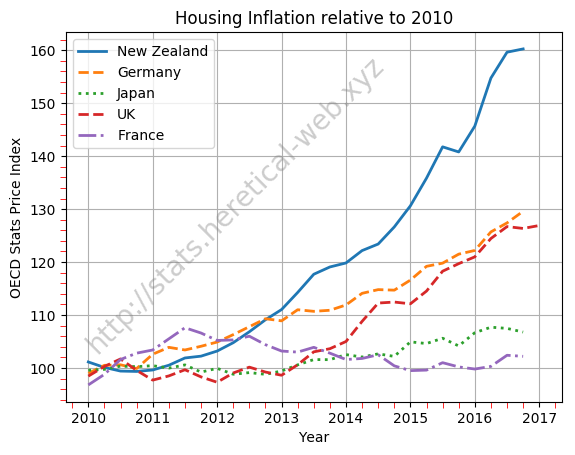

In [157]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcdefaults()
# One can supply an argument to AutoMinorLocator to
# specify a fixed number of minor intervals per major interval, e.g.:
# minorLocator = AutoMinorLocator(2)
# would lead to a single minor tick between major ticks.

# Each axis needs its own locator or only one axis will be marked with minor ticks
minorLocatorX = AutoMinorLocator(4)
minorLocatorY = AutoMinorLocator(5)

fig, ax = plt.subplots()
ax.plot(pvt.index, pvt['New Zealand'],'-', linewidth=2, label='New Zealand')
ax.plot(pvt.index, pvt['Germany'],'--', linewidth=2, label='Germany')
ax.plot(pvt.index, pvt['Japan'],':', linewidth=2, label='Japan')
ax.plot(pvt.index, pvt['United Kingdom'],'--', linewidth=2, label='UK')
ax.plot(pvt.index, pvt['France'],'-.', linewidth=2, label='France')

ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('OECD Stats Price Index')
ax.yaxis.set_minor_locator(minorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.grid(axis='both', which='major')
plt.tick_params(axis='both', which='minor', length=4, color='r')
#plt.xticks(range(1970,2017), rotation=45)
plt.title('Housing Inflation relative to 2010')
#savefig('GDP-per-hours-worked.png')
# position bottom right
fig.text(0.15, 0.2, 'http://stats.heretical-web.xyz',
         axes=ax, fontsize=20, color='gray', rotation=45,
         ha='left', va='bottom', alpha=0.4)
plt.show()

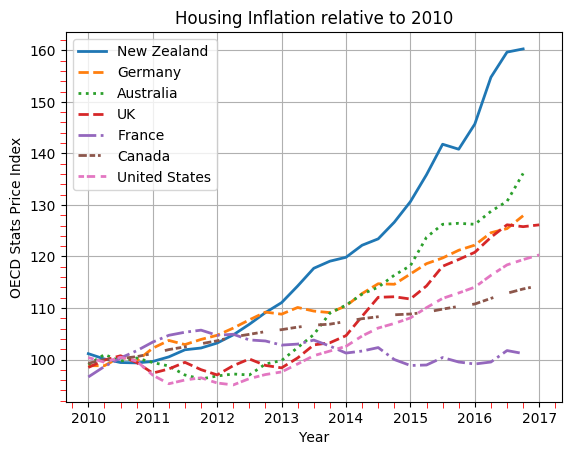

In [134]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcdefaults()
# One can supply an argument to AutoMinorLocator to
# specify a fixed number of minor intervals per major interval, e.g.:
# minorLocator = AutoMinorLocator(2)
# would lead to a single minor tick between major ticks.

# Each axis needs its own locator or only one axis will be marked with minor ticks
minorLocatorX = AutoMinorLocator(4)
minorLocatorY = AutoMinorLocator(5)

fig, ax = plt.subplots()
ax.plot(pvt1.index, pvt1['New Zealand'],'-', linewidth=2, label='New Zealand')
ax.plot(pvt1.index, pvt1['Germany'],'--', linewidth=2, label='Germany')
ax.plot(pvt1.index, pvt1['Australia'],':', linewidth=2, label='Australia')
ax.plot(pvt1.index, pvt1['United Kingdom'],'--', linewidth=2, label='UK')
ax.plot(pvt1.index, pvt1['France'],'-.', linewidth=2, label='France')
ax.plot(pvt1.index, pvt1['Canada'],dashes=[3,1,2,1,1,6], linewidth=2, label='Canada')
ax.plot(pvt1.index, pvt1['United States'],dashes=[2,1,3,2], linewidth=2, label='United States')

ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('OECD Stats Price Index')
ax.yaxis.set_minor_locator(minorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.grid(axis='both', which='major')
plt.tick_params(axis='both', which='minor', length=4, color='r')
#plt.xticks(range(1970,2017), rotation=45)
plt.title('Housing Inflation relative to 2010')
#savefig('GDP-per-hours-worked.png')
plt.show()